STAT619 \\
HW 4 \\
Juan Guzman

In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R
install.packages("lubridate")
install.packages("tidyverse")
install.packages("tseries")
install.packages("forecast")
install.packages("zoo")

In [ ]:
# Include your R code for each part of the assignment.
#Provide a brief interpretation of the AR, MA, and ARMA models fitted to the CO2 dataset.

#Discuss the model parameters, fit, and any insights gained from the analysis.
%%R
library(lubridate)
library(tseries)
library(forecast)
library(zoo)
library(tidyverse)

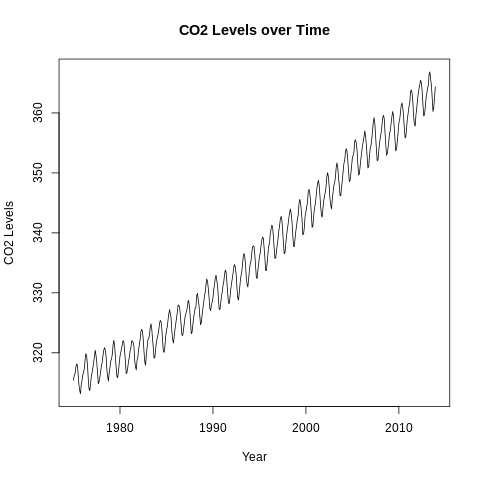

In [ ]:
%%R
# Load the co2 dataset and plot the time series.
# Describe any noticeable trends, seasonality, or patterns.
# Read the data and plot.

co2_data <- read.csv("/content/drive/MyDrive/STAT619 - Time series analysis /hw4_co2.csv", sep = ",")
# print(co2_data)

# Convert numeric date to Date format
co2_data$date <- as.Date(co2_data$date, origin = "1970-01-01")

# Create a time series object
co2_ts <- ts(co2_data$CO2, start = c(year(min(co2_data$date))), frequency = 12)

# Plot the time series
plot(co2_ts, main = "CO2 Levels over Time", xlab = "Year", ylab = "CO2 Levels")

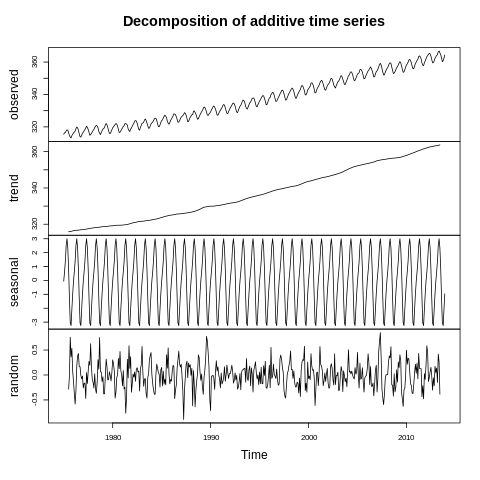

In [ ]:
%%R
# Decompose the time series
co2_components <- decompose(co2_ts)
plot(co2_components)

# From the decomposition plot. the CO2 time series contains a trend, and a seassonal
# component, and some randomness to the time series.


Call:
arima(x = co2_data$CO2, order = c(2, 0, 0), optim.control = list(maxit = 1000))

Coefficients:
         ar1      ar2  intercept
      1.7084  -0.7127   338.0622
s.e.  0.0325   0.0326     8.1002

sigma^2 estimated as 0.725:  log likelihood = -592.18,  aic = 1192.36

Training set error measures:
                     ME      RMSE       MAE         MPE      MAPE      MASE
Training set 0.02542156 0.8514867 0.6984345 0.006988939 0.2072078 0.6489374
                 ACF1
Training set 0.349436


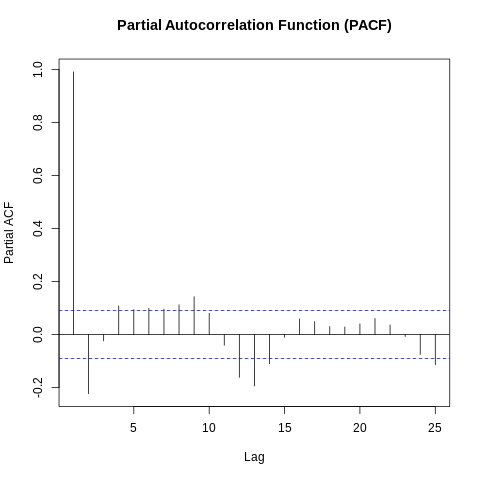

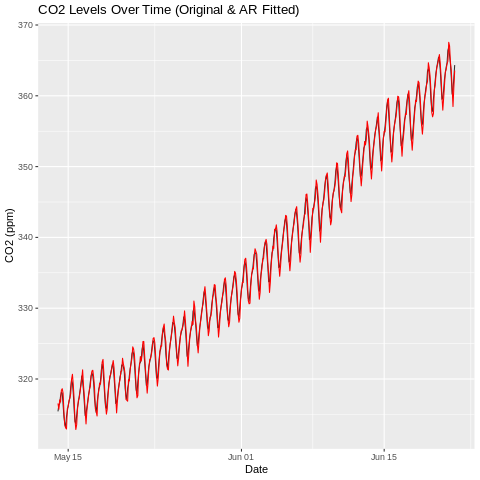

In [ ]:
%%R
################################################################################
# Fit an AR model.
# Determine an appropriate order for the AR model by examining the
# Partial Autocorrelation Function (PACF).
# Identify AR model order using PACF
################################################################################

# PACF plot
pacf_values <- pacf(co2_data$CO2, lag.max = 25, main = "Partial Autocorrelation Function (PACF)")

# The PACF indicates a very sharp initial lag, then immediately inverts to negative.
# there are a few positive lags and a few negative lags. At lags 12 and 13 the pacf becomes negative significant
# There seems to be an oscillation aswell.

# An AR(2) could work for the AR model

summary(pacf_values)

# Fit the AR Model
AR_model <- arima(co2_data$CO2, order = c(2,0,0), optim.control = list(maxit = 1000))
print(summary(AR_model))


# Plot the CO2 time series along with fitted values
ggplot(data = co2_data, aes(x = date, y = CO2)) +
  geom_line(color = 'black', alpha = 0.8) +
  geom_line(aes(y = fitted(AR_model)), color = 'red') +
  labs(title = "CO2 Levels Over Time (Original & AR Fitted)", x = "Date",
       y = "CO2 (ppm)")

In [ ]:
%%R
################################################################################
# Calculate fitted values for the AR model
# Calculate fitted values for the AR model
aic_value_AR <- AIC(AR_model)
print("AIC value: ")
print(aic_value_AR)

bic_value_AR <- BIC(AR_model)
print("BIC value: ")
print(bic_value_AR)

[1] "AIC value: "
[1] 1192.358
[1] "BIC value: "
[1] 1208.951


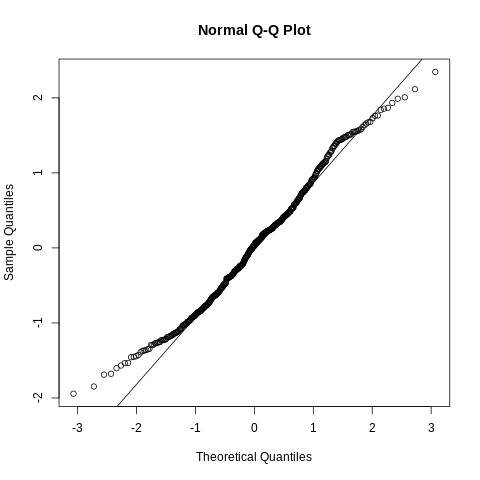

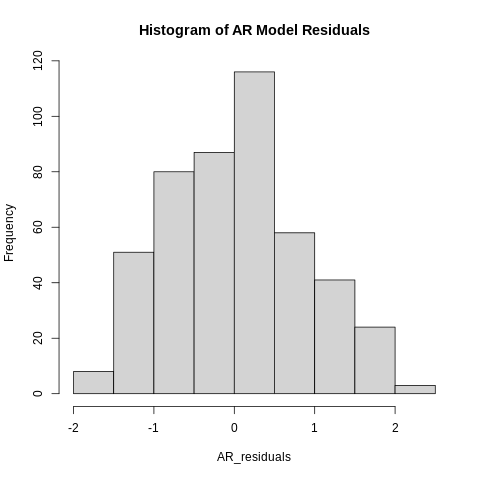

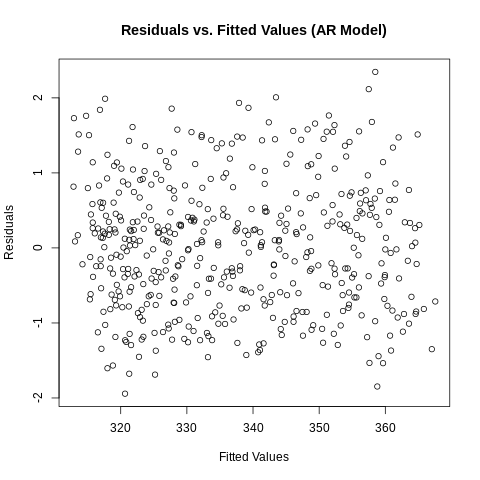

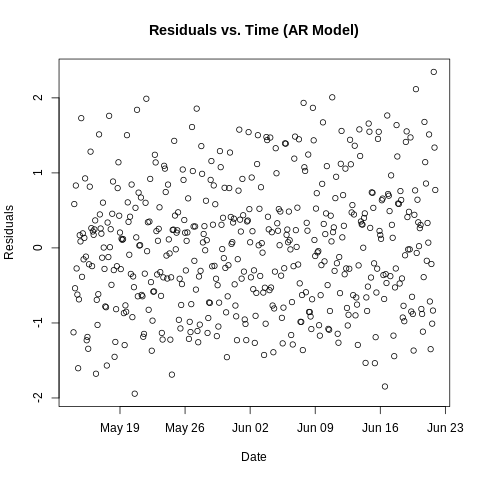

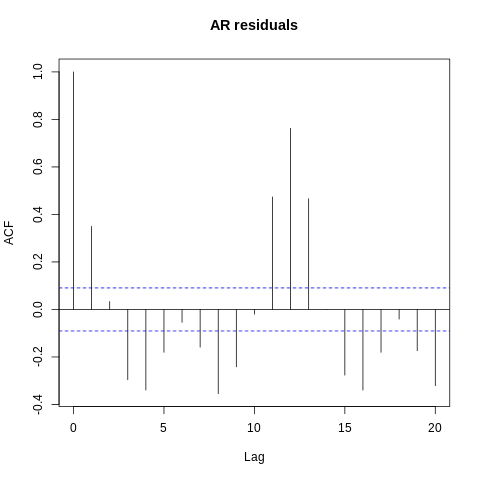

In [ ]:
%%R
################################################################################
# Residual analysis for AR model
AR_residuals <- residuals(AR_model)

# Normality probability plot
qqnorm(AR_residuals)
qqline(AR_residuals)

# Histogram
hist(AR_residuals, main = "Histogram of AR Model Residuals")

# Residuals vs. Fitted Values
plot(fitted(AR_model), AR_residuals, main = "Residuals vs. Fitted Values (AR Model)", xlab = "Fitted Values", ylab = "Residuals")

# Residuals vs. Time
plot(co2_data$date, AR_residuals, main = "Residuals vs. Time (AR Model)", xlab = "Date", ylab = "Residuals")

acf(AR_residuals, lag.max=20, main = 'AR residuals')

In [ ]:
%%R
Box.test(AR_residuals, lag=20, type="Ljung-Box")

# Box-Ljung test

# data:  AR_residuals
# X-squared = 326.74, df = 20, p-value < 2.2e-16


	Box-Ljung test

data:  AR_residuals
X-squared = 939.81, df = 20, p-value < 2.2e-16



In [ ]:
#There still seems to be a correlation in the residuals, as the p value is larger that 0.05,
# Which indicates that that we cannot reject the null.

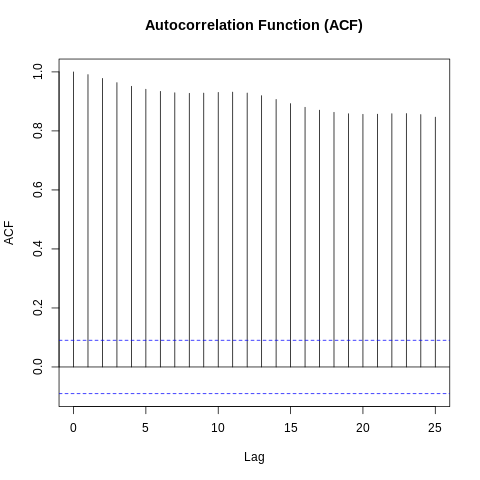

In [ ]:
%%R
################################################################################
# Fit an MA model.
# Select the order of the MA model based on the Autocorrelation Function (ACF).
# Fit an MA model and determine the order
################################################################################

# ACF plot
MA_acf <- acf(co2_data$CO2, lag.max = 25, main = "Autocorrelation Function (ACF)")

# Seem that the ACF for the Moving average model decreases very slowly, and there
# is no sudden drop of the values.


Call:
arima(x = co2_data$CO2, order = c(0, 0, 10))

Coefficients:
         ma1     ma2     ma3     ma4     ma5     ma6     ma7     ma8     ma9
      2.1291  3.2875  4.1732  4.6947  4.8487  4.5915  3.9175  2.8279  1.6391
s.e.  0.0402  0.0774  0.1054  0.1227  0.1330  0.1331  0.1231  0.1003  0.0644
        ma10  intercept
      0.5883   337.1155
s.e.  0.0364     1.2474

sigma^2 estimated as 0.6544:  log likelihood = -573.34,  aic = 1170.68

Training set error measures:
                     ME      RMSE       MAE          MPE     MAPE     MASE
Training set 0.01127575 0.8089477 0.6340847 -0.002244654 0.188404 0.589148
                  ACF1
Training set 0.1429953


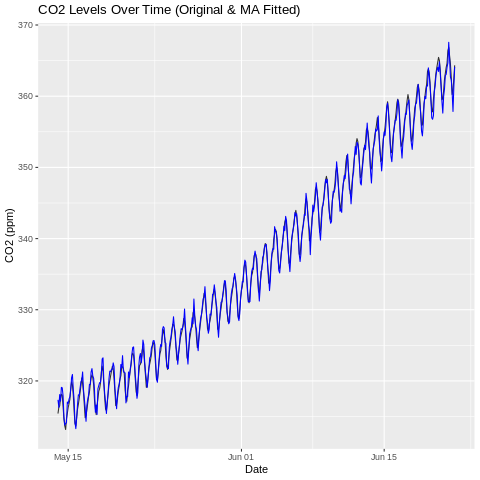

In [ ]:
%%R
# I'll use a order 10 and then check the model, the number 10 is arbitrary,
# but it'll gie us an idea where to proceed.

# Fit the MA model
MA_model <- arima(co2_data$CO2, order = c(0,0,10))
print(summary(MA_model))


# Plot the CO2 time series along with fitted values for the MA model
ggplot(data = co2_data, aes(x = date, y = CO2)) +
 geom_line(color = 'black', alpha = 0.8) +
 geom_line(aes(y = fitted(MA_model)), color = 'blue') +
 labs(title = "CO2 Levels Over Time (Original & MA Fitted)", x = "Date", y = "CO2 (ppm)")

In [ ]:
%%R
aic_value_MA <- AIC(MA_model)
print("AIC value: ")
print(aic_value_MA)

bic_value_MA <- BIC(MA_model)
print("BIC value: ")
print(bic_value_MA)

[1] "AIC value: "
[1] 1170.676
[1] "BIC value: "
[1] 1220.458


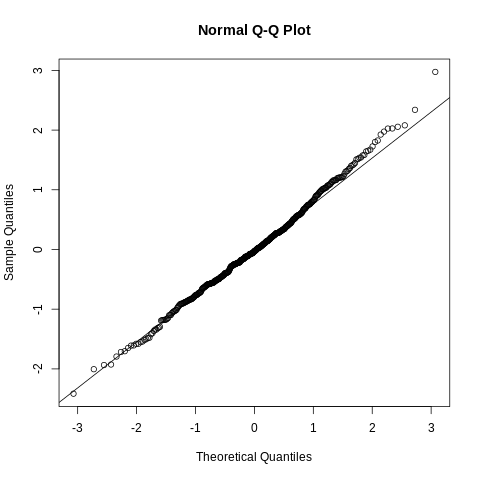

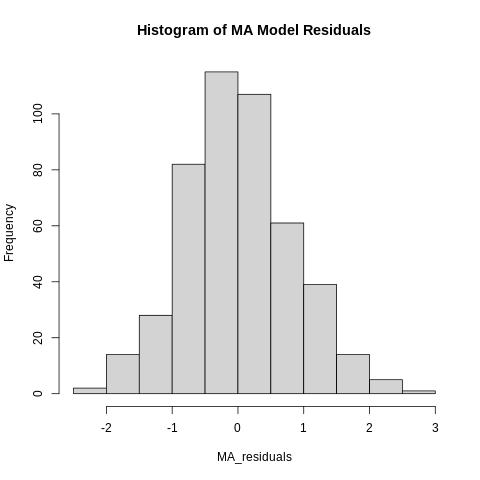

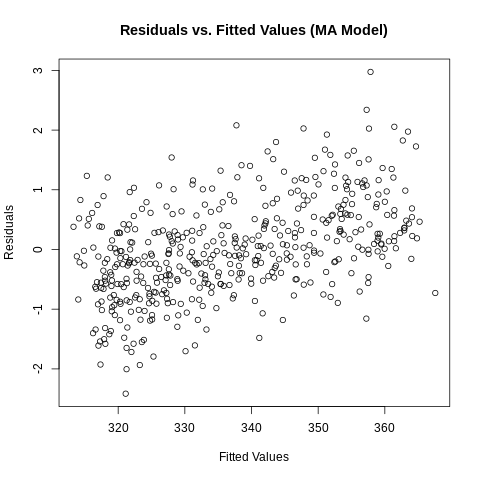

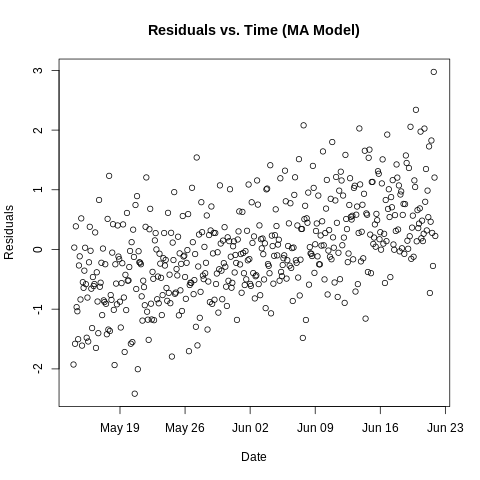

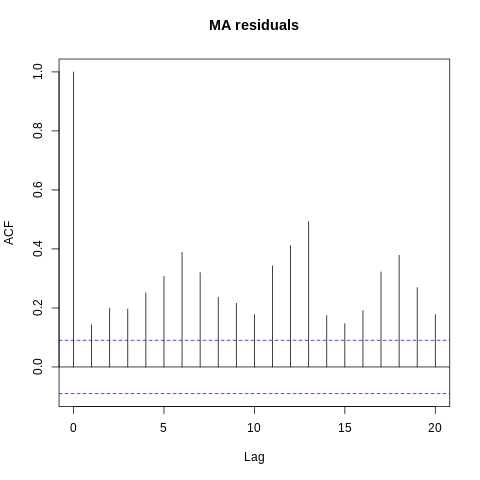

In [ ]:
%%R
################################################################################
# Calculate fitted values for the MA model
MA_residuals <- residuals(MA_model)

# Now, let's proceed with the residual analysis
# Normality probability plot
qqnorm(MA_residuals)
qqline(MA_residuals)

# Histogram
hist(MA_residuals, main = "Histogram of MA Model Residuals")

# Residuals vs. Fitted Values
plot(fitted(MA_model), MA_residuals, main = "Residuals vs. Fitted Values (MA Model)", xlab = "Fitted Values", ylab = "Residuals")


# Residuals vs. Time
plot(co2_data$date, MA_residuals, main = "Residuals vs. Time (MA Model)", xlab = "Date", ylab = "Residuals")

acf(MA_residuals, lag.max=20, na.action=na.pass,
    main = 'MA residuals')

In [ ]:
%%R
Box.test(MA_residuals, lag=20, type="Ljung-Box")

#Box-Ljung test

#data:  MA_residuals
#X-squared = 322.91, df = 20, p-value < 2.2e-16


	Box-Ljung test

data:  MA_residuals
X-squared = 776.77, df = 20, p-value < 2.2e-16



In [ ]:
# Just as with the AR model, the p value is very small thus unable to reject the null.
# Also the residuals seems to have a trend in the plots of residuals vs fitted values, and residuals vs time.
# This could indicate an order larger that 10.

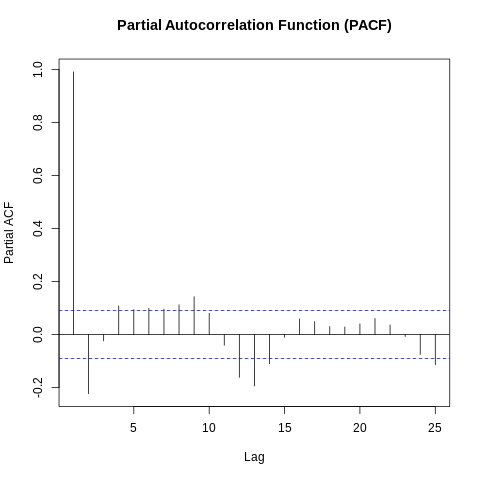

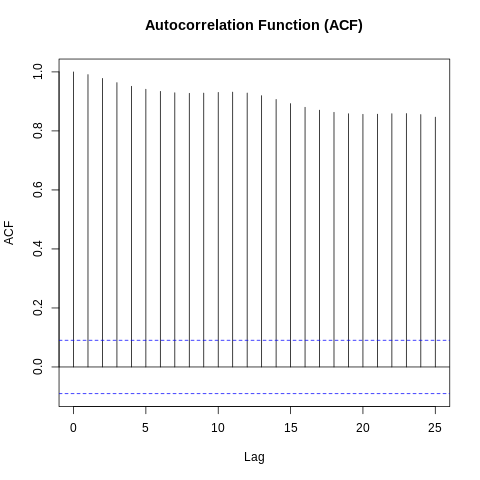

In [ ]:
%%R
################################################################################
# Fit an ARMA model.                                                           #
# Use both ACF and PACF plots to decide on the orders of the AR and MA parts.  #
# Evaluate the model based on the Akaike Information Criterion (AIC).          #
################################################################################

pacf_values <- pacf(co2_data$CO2, lag.max = 25, main = "Partial Autocorrelation Function (PACF)")
acf_values <- acf(co2_data$CO2, lag.max = 25, main = "Autocorrelation Function (ACF)")



Call:
arima(x = co2_data$CO2, order = c(2, 0, 10))

Coefficients:
         ar1     ar2     ma1     ma2     ma3     ma4     ma5     ma6     ma7
      0.4928  0.3156  1.5841  1.9622  2.1570  2.1899  2.1893  2.1598  2.0101
s.e.  0.1490  0.1382  0.1399  0.1646  0.2068  0.2280  0.2386  0.2293  0.2030
         ma8     ma9    ma10  intercept
      1.5787  1.0554  0.4020   337.2999
s.e.  0.1680  0.1091  0.0642     2.9794

sigma^2 estimated as 0.4764:  log likelihood = -496.81,  aic = 1021.62

Training set error measures:
                      ME      RMSE       MAE         MPE      MAPE      MASE
Training set 0.009339878 0.6901947 0.5526332 0.001122238 0.1642676 0.5134689
                    ACF1
Training set -0.02340223


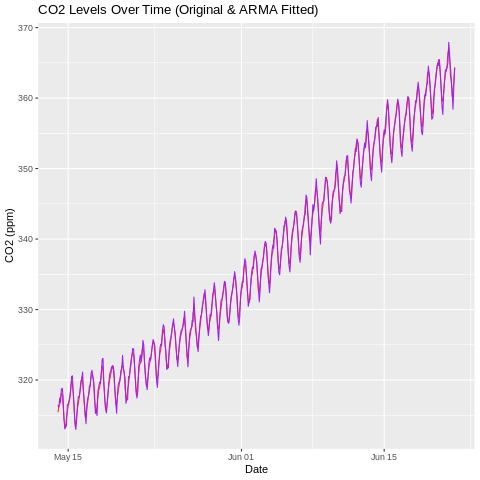

In [ ]:
%%R

# From the AR and MA models, and also the PACF and ACF plots, we could try to fit an
# ARMA(2,10) model and check how it behaves.

# Fit the ARMA model
ARMA_model <- arima(co2_data$CO2, order = c(2,0,10))
print(summary(ARMA_model))


# Plot the CO2 time series along with the fitted values
ggplot(data = co2_data, aes(x = date, y = CO2)) +
  geom_line(color = 'red', alpha = 0.8) +
  geom_line(aes(y = fitted(ARMA_model)), color = 'purple') +
  labs(title = "CO2 Levels Over Time (Original & ARMA Fitted)", x = "Date", y = "CO2 (ppm)")

In [ ]:
%%R
aic_value <- AIC(ARMA_model)
print("AIC value: ")
print(aic_value)

bic_value <- BIC(ARMA_model)
print("BIC value: ")
print(bic_value)

[1] "AIC value: "
[1] 1021.625
[1] "BIC value: "
[1] 1079.703


In [ ]:
# AIC value for the ARMA(2,10) is lower than both the AR and MA model

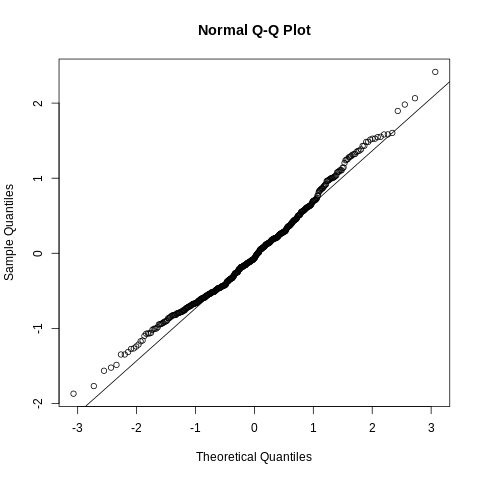

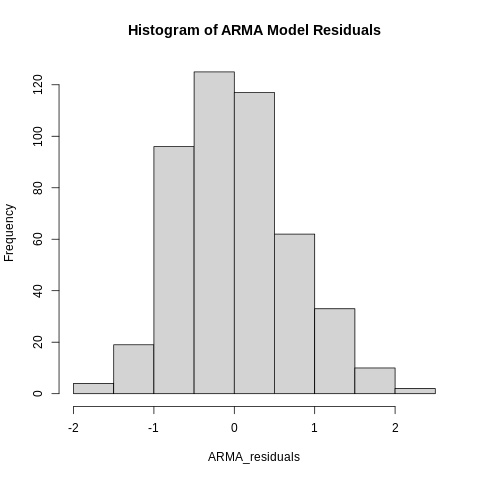

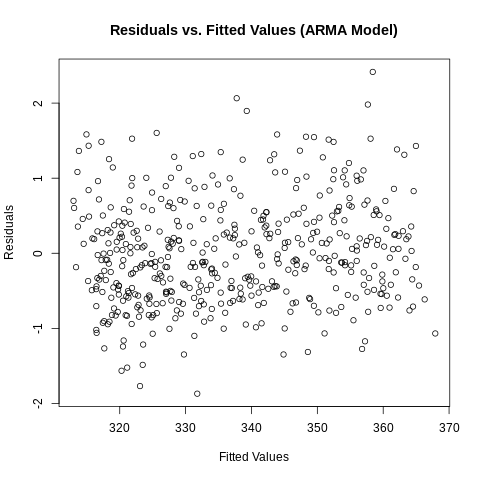

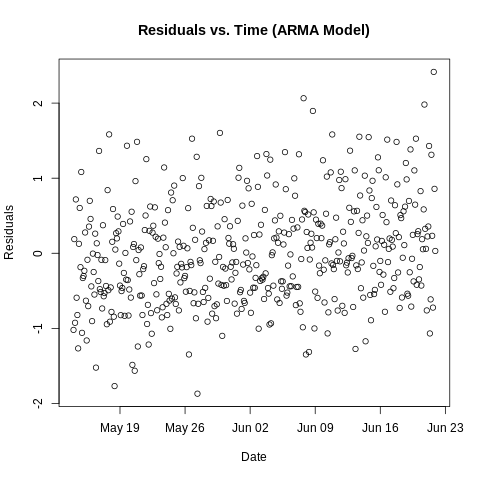

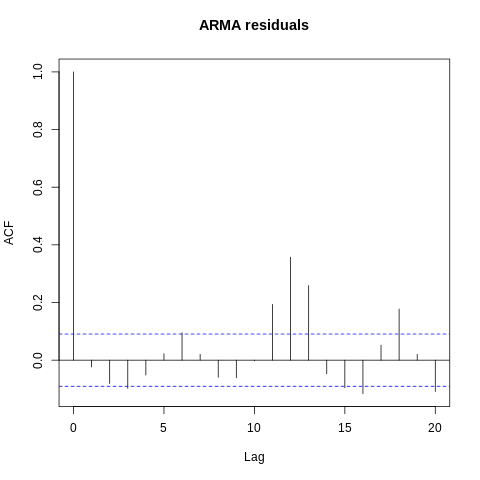

In [ ]:
%%R
################################################################################
# Residual analysis for ARMA model
ARMA_residuals <- residuals(ARMA_model)

# Normality probability plot
qqnorm(ARMA_residuals)
qqline(ARMA_residuals)

# Histogram
hist(ARMA_residuals, main = "Histogram of ARMA Model Residuals")

# Residuals vs. Fitted Values
plot(fitted(ARMA_model), ARMA_residuals, main = "Residuals vs. Fitted Values (ARMA Model)", xlab = "Fitted Values", ylab = "Residuals")

# Residuals vs. Time
plot(co2_data$date, ARMA_residuals, main = "Residuals vs. Time (ARMA Model)", xlab = "Date", ylab = "Residuals")

acf(ARMA_residuals, lag.max=20, na.action=na.pass,
    main = 'ARMA residuals')


In [ ]:
%%R
Box.test(ARMA_residuals, lag=20, type="Ljung-Box")

                      #Box-Ljung test

#data:  ARMA_residuals
#X-squared = 507.33, df = 20, p-value < 2.2e-16


	Box-Ljung test

data:  ARMA_residuals
X-squared = 164.2, df = 20, p-value < 2.2e-16



In [ ]:
# So once again, the p value is too low and thus the null is not rejected.
# However, the AIC value for the ARMA model is lower compared to the other
# 2 models.

In [ ]:
################################################################################
#
# Evaluate all models. Which one is more preferred? Explain.
#
################################################################################

# Investigate the normality of the error term from AR, MA, and ARMA models

# Let's check the following for Residual plots:
# * Normality probability
# * Histogram
# * Against fitted values
# * Against time

################################################################################

# WE have check the  the plots for each model, and every model may not be the ideal model.
# Each model displays some type of residual correlation, confirmed by the Box-Ljung test.
# This could be explained by the fact the the CO2 time series is non-stationary.
# I would recommend the ARMA model due to campuring more complexity, and the other 2 models
# would require higher orders to lower the AIC valeu.

# next steps:
# We may need to include additional terms in the models to better capture the underlying structure of the data.
# Advanced Models: maybe a more sophisticated model like ARIMA couls give a better model fitting.

In [ ]:
!jupyter nbconvert --to html /content/STAT619_HW4.ipynb

[NbConvertApp] Converting notebook /content/STAT619_HW4.ipynb to html
[NbConvertApp] Writing 1237708 bytes to /content/STAT619_HW4.html
